In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [15]:
#loading the csv to pandas dataframe
Heart_data=pd.read_csv('/content/Cardiovascular_Disease_Dataset.csv')

In [16]:
#check missing value
Heart_data.isnull().sum()

,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


In [17]:
#Statisitical measures about the data
Heart_data.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [18]:
#checking the distribution of target variable
Heart_data['target'].value_counts()

,count
target,
1,580
0,420


In [19]:
# Define features and target
X=Heart_data.drop(columns=['target', 'patientid'],axis=1)
Y=Heart_data['target']
#spliting test and train datA
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [20]:
# Initialize and train the Random Forest Classifier with reduced overfitting risk
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,    # Require at least 5 samples per leaf (higher helps regularization)
    max_features="log2",   # Consider fewer features per split for better generalization
    bootstrap=True,        # Use bootstrapping to introduce randomness
    oob_score=True,        # Use Out-of-Bag samples to evaluate generalization
    class_weight="balanced",
    random_state=42
)
# Train the model
clf.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_leaf=5,
                       min_samples_split=10, oob_score=True, random_state=42)

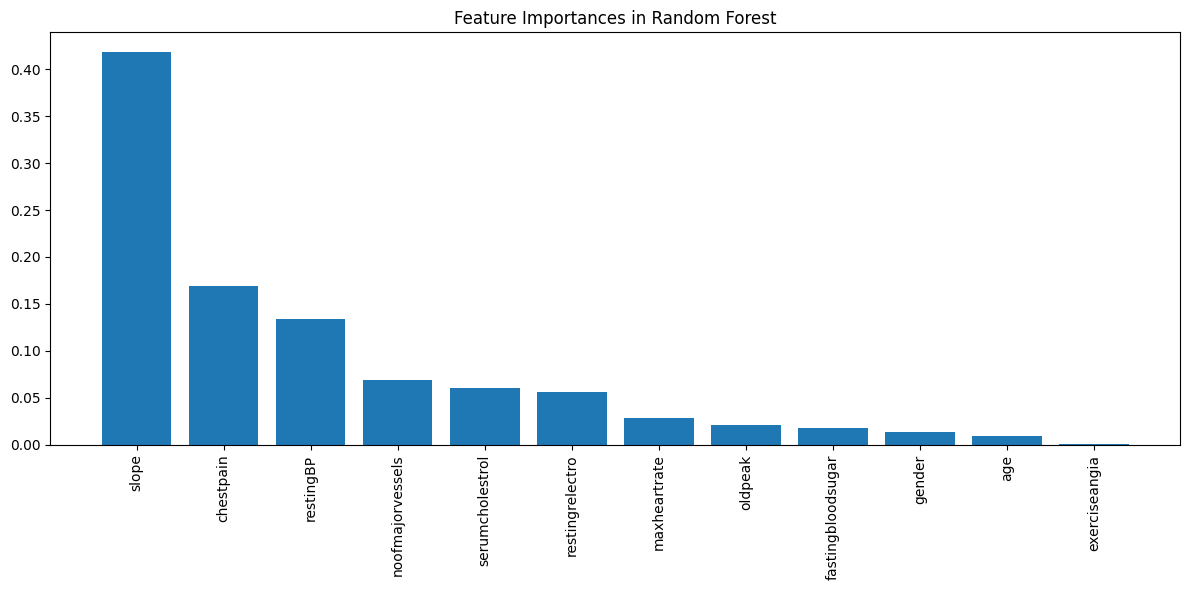

In [21]:
# Feature Importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances in Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [22]:

# Drop less important features
X_train_reduced = X_train.drop(columns=["age", "gender", "exerciseangia"])
X_test_reduced = X_test.drop(columns=["age", "gender", "exerciseangia"])

# Retrain the model
clf.fit(X_train_reduced, Y_train)

# Train the model
clf.fit(X_train, Y_train)

# Print Out-of-Bag Score (helps understand generalization)
print(f"OOB Score: {clf.oob_score_:.4f}")


OOB Score: 0.9587


In [23]:
# Make predictions
Y_pred = clf.predict(X_test)

In [24]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(Y_test, Y_pred))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        84
           1       0.98      0.97      0.98       116

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



In [25]:
train_accuracy = accuracy_score(Y_train, clf.predict(X_train))
print(f"Training Accuracy: {train_accuracy:.2f}")
test_accuracy = accuracy_score(Y_test, clf.predict(X_test))
print(f"Test Accuracy: {test_accuracy:.2f}")



Training Accuracy: 0.98
Test Accuracy: 0.97


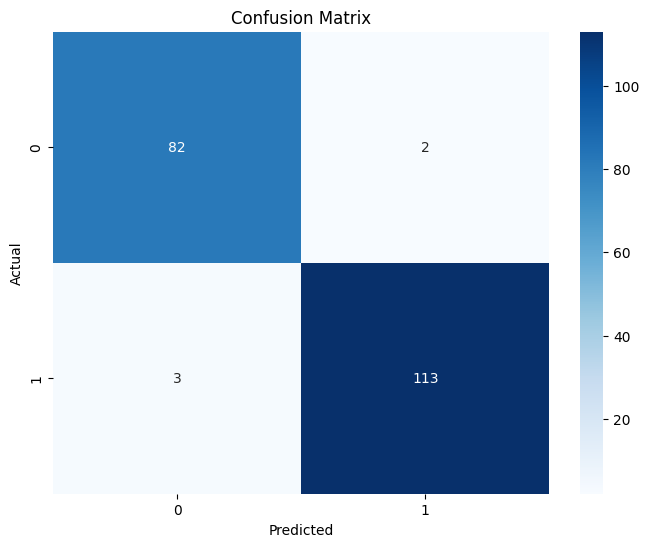

In [26]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

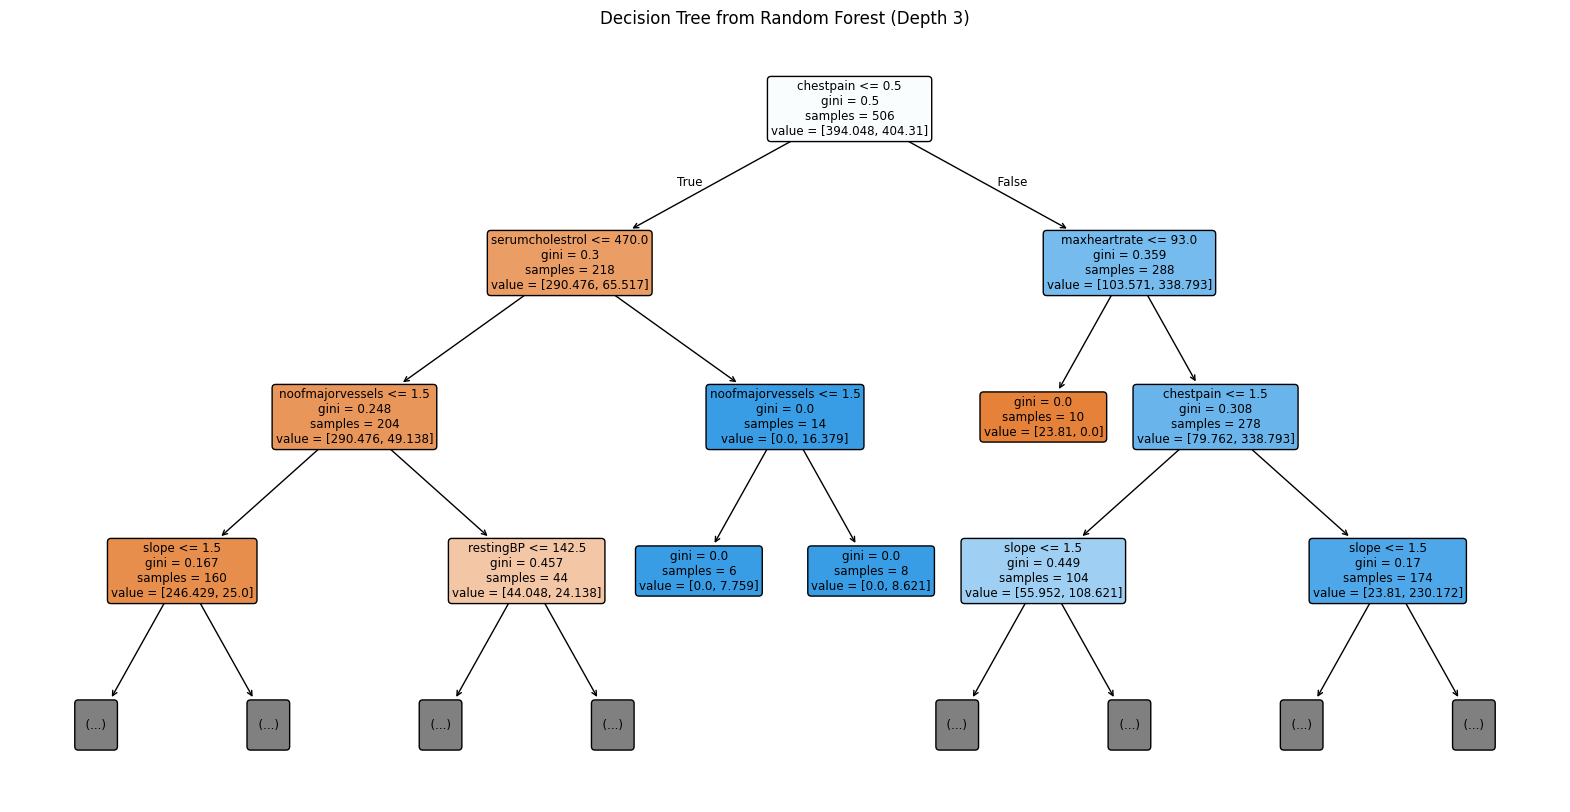

In [27]:
# Visualize One Decision Tree from the Random Forest
plt.figure(figsize=(20,10))
tree.plot_tree(clf.estimators_[0], feature_names=X.columns, filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree from Random Forest (Depth 3)")
plt.show()

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

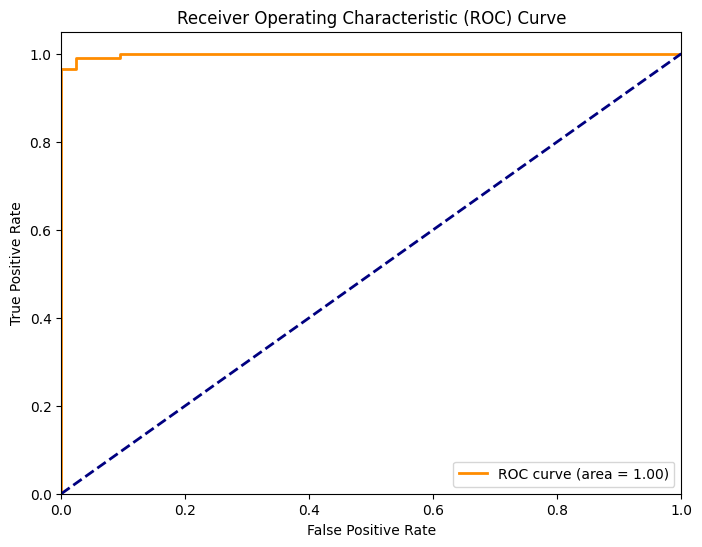

In [29]:
# ROC Curve Visualization
# Compute predicted probabilities for the positive class
Y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = roc_auc_score(Y_test, Y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
# Load the new dataset
new_data = pd.read_csv('/content/new dataset for Random Forest Model.csv')

In [31]:
# Separate features (drop 'target')
X_new = new_data.drop(columns=['target',], axis=1, errors='ignore')

# Extract the true target values from the new dataset
Y_new = new_data['target']

In [32]:
#Show column names
print("X_train columns:", X_train.columns)
print("X_new columns:", X_new.columns)


X_train columns: Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels'],
      dtype='object')
X_new columns: Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope'],
      dtype='object')


In [33]:
# Redefine column names
rename_mapping = {
    'sex': 'gender',
    'chest pain type': 'chestpain',
    'resting bp s': 'restingBP',
    'cholesterol': 'serumcholestrol',
    'fasting blood sugar': 'fastingbloodsugar',
    'max heart rate': 'maxheartrate',
    'resting ecg': 'restingrelectro',
    'exercise angina': 'exerciseangia',
    'ST slope': 'slope',

}
# Rename columns to match training feature names
X_new.rename(columns=rename_mapping, inplace=True)

# Check if any training features are missing in the new dataset
expected_features = ['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
                     'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
                     'oldpeak', 'slope', 'noofmajorvessels']

for feature in expected_features:
    if feature not in X_new.columns:
           X_new[feature] = X_train[feature]

In [34]:
# Get training dataset column names
X_train_columns = X_train.columns.tolist()

# Ensure new dataset matches training features
X_new = X_new[X_train.columns]

# Predict on new dataset using trained model
Y_new_pred = clf.predict(X_new)

In [35]:

#  Evaluate the Predictions
new_accuracy = accuracy_score(Y_new, Y_new_pred)
print(f'New Dataset Accuracy: {new_accuracy:.2f}')
print('New Dataset Classification Report:')
print(classification_report(Y_new, Y_new_pred))

New Dataset Accuracy: 0.74
New Dataset Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.53      0.65       561
           1       0.69      0.92      0.79       629

    accuracy                           0.74      1190
   macro avg       0.77      0.73      0.72      1190
weighted avg       0.77      0.74      0.72      1190



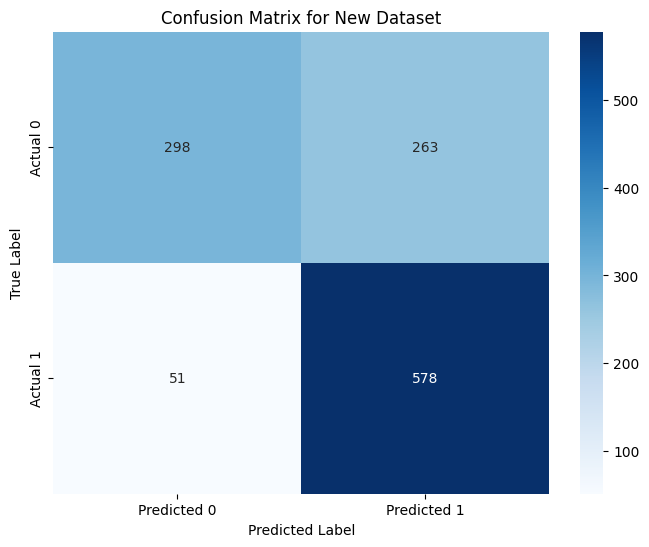

In [36]:
# Generate confusion matrix for the new dataset
cm = confusion_matrix(Y_new, Y_new_pred)  # Use Y_new (true labels for new data)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for New Dataset')
plt.show()

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
# Evaluate the trained model using 5-fold cross-validation on the new dataset

cv_scores = cross_val_score(clf, X_new, Y_new, cv=5)
print("\nCross-validation scores on new dataset:", cv_scores)
print("Average cross-validation score on new dataset:", cv_scores.mean())


Cross-validation scores on new dataset: [0.88655462 0.88655462 0.92857143 0.79831933 0.85294118]
Average cross-validation score on new dataset: 0.8705882352941176


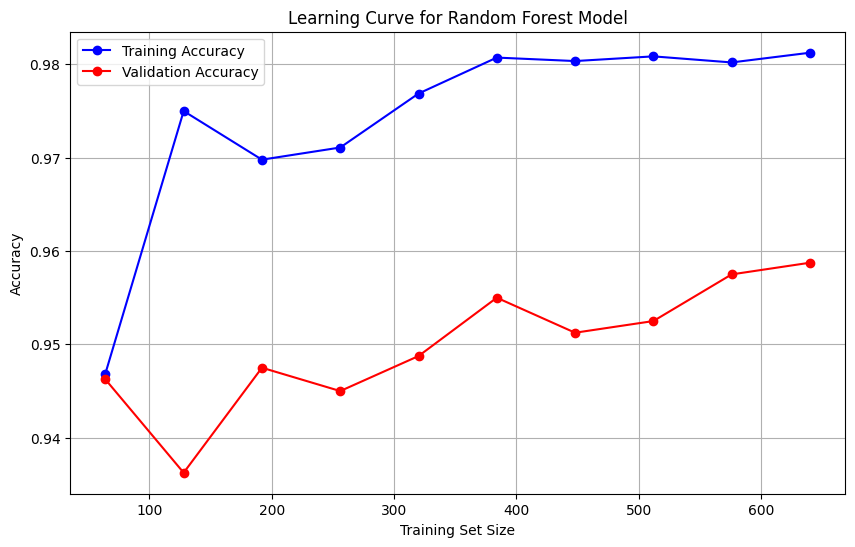

In [39]:

from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Define the range of training set sizes to use for the learning curve
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=clf,
    X=X_train,
    y=Y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 different sizes from 10% to 100% of the training set
    cv=5,                       # 5-fold cross-validation
    scoring='accuracy',         # use accuracy as the performance metric
    n_jobs=-1
)

# Calculate mean accuracy for each training set size
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Validation Accuracy')
plt.title('Learning Curve for Random Forest Model')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [40]:
# Combine both datasets
combined_data = pd.concat([Heart_data, new_data], axis=0).reset_index(drop=True)

#checking the distribution of target variable
combined_data['target'].value_counts()

,count
target,
1,1209
0,981


In [41]:

# Separate features and target variable
X_combined = combined_data.drop(columns=['target'], errors='ignore')
Y_combined = combined_data['target']

# Split into new training and test sets (80-20 split)
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(
    X_combined, Y_combined, test_size=0.2, random_state=42, stratify=Y_combined
)

# Initialize a new Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight="balanced")

# Train the model on the combined dataset
rf_model.fit(X_train_new, Y_train_new)

# Evaluate the new model
new_accuracy = rf_model.score(X_test_new, Y_test_new)
new_accuracy


0.9497716894977168